# Using `sci-kit learn`, i.e. `sklearn` for Machine Learning (ML); in combination with `numpy`,`scipy`, and `pandas`

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets

In [3]:
import os, sys
os.getcwd()
os.listdir( os.getcwd() ) ;

In [4]:
import numpy as np
import scipy

In [5]:
import pandas as pd

cf. [Linear Regression with One Variable, Coursera](https://www.coursera.org/learn/machine-learning/exam/QeJ50/linear-regression-with-one-variable)

In [7]:
np.random.random(10).shape  # testing, playing, 

(10,)

In [10]:
x = np.array([5,3,0,4])
y = np.array([4,4,1,3])
x.shape

(4,)

In [18]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
print( slope, intercept, r_value,p_value,std_err)

(0.5714285714285714, 1.2857142857142858, 0.87287156094396956, 0.12712843905603044, 0.22587697572631277)


In [16]:
( (x-y)*(x-y) ).mean()/2.

0.5

In [17]:
-1.+0.5*4

1.0

cf. [Week 1, Linear Algebra Review, Coursera, Machine Learning with Ng](https://www.coursera.org/learn/machine-learning/lecture/38jIT/matrices-and-vectors)

I'll take this opportunity to provide a dictionary between the syntax of linear algebra math and `numpy`

## Linear Regression

cf. Week 2 [Programming Assignment:Linear Regression](https://www.coursera.org/learn/machine-learning/programming/8f3qT/linear-regression), 1st programming assignment, [`machine-learning-ex1.zip`](https://s3.amazonaws.com/spark-public/ml/exercises/on-demand/machine-learning-ex1.zip) 

cf. `machine-learning-ex1/ex1/warmUpExercise.m` of Week 2 Programming Assignment: Linear Regression of Coursera Machine Learning by Ng, i.e.  

#### 1 Simple Octave/MATLAB function


In [19]:
np.identity(5) # eye(5) in Matlab/Octave

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

### 2 Linear regression with one variable  

cf. `machine-learning-ex1/ex1/ex1data1.txt` and `machine-learning-ex1/ex1.pdf`

In [6]:
os.listdir( './coursera_Ng/machine-learning-ex1/' )

['ex1.pdf', 'ex1', 'matlab-python-xref.pdf', 'surface3d_demo.py']

In [7]:
os.listdir( './coursera_Ng/machine-learning-ex1/ex1' )

['submit.m',
 'normalEqn.m',
 'token.mat',
 'gradientDescentMulti.m',
 'plotData.m',
 'featureNormalize.m',
 'computeCost.m',
 'gradientDescent.m',
 'ex1_multi.m',
 'warmUpExercise.m',
 'ex1data1.txt',
 'lib',
 'computeCostMulti.m',
 'ex1data2.txt',
 'ex1.m']

[`pandas.read_csv`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html), Parameters: header: defaults to 0, if no names are passed, but we need to set it to `None` so not to include the first row

In [8]:
## ================================== Part 2: Plotting =====================================
print("Plotting Data ... \n")
linregdata = pd.read_csv('./coursera_Ng/machine-learning-ex1/ex1/ex1data1.txt', header=None)

Plotting Data ... 



In [9]:
print( linregdata.describe() )
linregdata.head()

               0          1
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000


,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [10]:
X_linreg = linregdata.as_matrix()[:,0]  # pandas.DataFrame.as_matrix convert frame to its numpy-array representation
y_linreg = linregdata.as_matrix()[:,1]
m_linreg = len(y_linreg)  # number of training examples  
print( X_linreg.shape, type(X_linreg)) 
print( y_linreg.shape, type(y_linreg)) 
print m_linreg

((97,), <type 'numpy.ndarray'>)
((97,), <type 'numpy.ndarray'>)
97


In [42]:
X_linreg

array([  6.1101,   5.5277,   8.5186,   7.0032,   5.8598,   8.3829,
         7.4764,   8.5781,   6.4862,   5.0546,   5.7107,  14.164 ,
         5.734 ,   8.4084,   5.6407,   5.3794,   6.3654,   5.1301,
         6.4296,   7.0708,   6.1891,  20.27  ,   5.4901,   6.3261,
         5.5649,  18.945 ,  12.828 ,  10.957 ,  13.176 ,  22.203 ,
         5.2524,   6.5894,   9.2482,   5.8918,   8.2111,   7.9334,
         8.0959,   5.6063,  12.836 ,   6.3534,   5.4069,   6.8825,
        11.708 ,   5.7737,   7.8247,   7.0931,   5.0702,   5.8014,
        11.7   ,   5.5416,   7.5402,   5.3077,   7.4239,   7.6031,
         6.3328,   6.3589,   6.2742,   5.6397,   9.3102,   9.4536,
         8.8254,   5.1793,  21.279 ,  14.908 ,  18.959 ,   7.2182,
         8.2951,  10.236 ,   5.4994,  20.341 ,  10.136 ,   7.3345,
         6.0062,   7.2259,   5.0269,   6.5479,   7.5386,   5.0365,
        10.274 ,   5.1077,   5.7292,   5.1884,   6.3557,   9.7687,
         6.5159,   8.5172,   9.1802,   6.002 ,   5.5204,   5.0

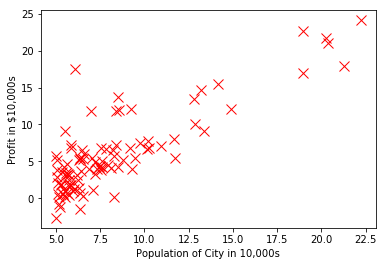

In [45]:
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot( X_linreg, y_linreg, 'rx', markersize=10)

## Batch Gradient Descent

cf. `machine-learning-ex1/ex1/ex1.m`

cf. [How to add column to numpy array](http://stackoverflow.com/questions/15815854/how-to-add-column-to-numpy-array)

"
```   
all_data = np.hstack((my_data, new_col))
#or
all_data = np.concatenate((my_data, new_col), 1)   
```  

I believe that the only difference between these three functions (as well as np.vstack) are their default behaviors for when axis is unspecified:

    * `concatenate` assumes axis = 0
    * `hstack` assumes axis = 1 unless inputs are 1d, then `axis = 0`
    * `vstack` assumes axis = 0 after adding an axis if inputs are 1d
    * `append` flattens array
"

See also [How to add an extra column to an numpy array](http://stackoverflow.com/questions/8486294/how-to-add-an-extra-column-to-an-numpy-array)

"I think a more straightforward solution and faster to boot is to do the following:"
```   
import numpy as np
N = 10
a = np.random.rand(N,N)
b = np.zeros((N,N+1))
b[:,:-1] = a   
```  


In [11]:
# np.hstack( ( np.ones((m_linreg,1)), X_linreg.reshape(,1) ) ).shape

input_X_linreg = np.vstack( (np.ones(m_linreg), X_linreg ) ).T
input_X_linreg.shape

(97, 2)

In [64]:
b = np.ones((m_linreg,1))
b.shape
b[:,:-1] = X_linreg 


ValueError: could not broadcast input array from shape (97) into shape (97,0)

In [12]:

theta = np.zeros((2,1)); print( theta )

[[ 0.]
 [ 0.]]


In [ ]:
# Some gradient descent settings
iterations = 1500 
alpha = 0.01  # learning rate

In [84]:
print( np.dot( input_X_linreg, theta ).shape )
y_linreg.reshape((len(y_linreg),1)).shape
#(np.dot( input_X_linreg, theta) - y_linreg ).shape

(97, 1)


(97, 1)

In [90]:
res = np.dot(input_X_linreg,theta) - y_linreg.reshape((len(y_linreg),1)) 
(res*res).mean()

64.145467754911351

In [105]:
print( res.shape) 
print( input_X_linreg.shape )
print( X_linreg.shape)
input_X_linreg[:,1].reshape( 97,1).shape

(97, 1)
(97, 2)
(97,)


(97, 1)

In [109]:
# ( res * input_X_linreg[:,1].reshape(m_linreg,1) ).shape
dres = ( res * input_X_linreg )
print(dres.shape)
dres.mean(axis=0)

(97, 2)


array([ -5.83913505, -65.32884975])

In [115]:
temp = theta.flatten() - 0.5 * dres.mean(axis=0)
print( temp)

[  2.91956753  32.66442487]


In [118]:
theta - np.vstack( temp)

array([[ -2.91956753],
       [-32.66442487]])

The object of linear regression is to minimize the **cost function**:  
    
$$   
J(\theta) = \frac{1}{2m} \sum_{i=1}^m(h_{\theta}(x^{i}) - y^{(i)})^2
$$

In [13]:
def computeCost(X,y,theta):
    """
    COMPUTECOST Compute cost for linear regression
    J = COMPUTECOST(X, y, theta) computes the cost of using theta as the 
    parameter for linear regression to fit the data points in X and y
    
    """
    
    # Initialize some useful values
    m = len(y) # number of training examples
    
    # You will need to return the following variable correctly
    J = 0
    
    # attach a column of 1's to make \theta_0 a feature
    input_X_linreg = np.vstack( (np.ones(m), X)).T  # take the transpose since the np array is a "row"
            
    # preprocess inputs X,y to make sure numpy array dimensions are correct
    target_y_linreg = y.reshape((m,1))
        
    # Compute the cost of a particular choice of theta.  Set J to the cost
    ## assume that theta is a numpy array of dim. 2x1 and not (2,)
    predicted_vals = np.dot( input_X_linreg, theta)  # X * \theta
    
    res = predicted_vals - target_y_linreg  # res for residual
    ressq = res * res
    J = ressq.mean() * 0.5    
    return J

In [93]:
computeCost(X_linreg, y_linreg, theta)

32.072733877455676

# Gradient descent 
## Batch Gradient descent

In [14]:
def gradientDescent(X, y, theta, alpha, num_iters=1500):
    """
    GRADIENTDESCENT Performs gradient descent to learn theta  
    theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
    taking num_iters gradient steps with learning rate alpha  
    """
    
    # Initialize some useful values
    m = len(y)
    J_history = np.zeros(num_iters);
    
    # attach a column of 1's to make \theta_0 a feature
    input_X_linreg = np.vstack( (np.ones(m), X)).T
    
    # preprocess inputs X,y to make sure numpy array dimensions are correct
    target_y_linreg = y.reshape((m,1))
    
    
    for iter in range(num_iters):  
        # perform a single gradient step on the parameter vector theta

        ## assume that theta is a numpy array of dim. 2x1, and not (2,)
        ### predicted_vals is h_{\theta}(x^{(i)}), h is the hypothesis
        predicted_vals = np.dot( input_X_linreg, theta) # X * \theta

        res = predicted_vals - target_y_linreg # res for residual
        
        dres = res * input_X_linreg  # it's the partial derivative with respect to each x_j
        
        temp = theta.flatten() - alpha * dres.mean( axis=0)
        theta = np.vstack( temp )  # this is effectively numpy's transpose from row to column vector
        
        J_history[iter] = computeCost(X,y,theta)

    return theta, J_history
        
        
        

In [120]:
theta

array([[ 0.],
       [ 0.]])

In [121]:
result_1d_graddesc = gradientDescent(X_linreg, y_linreg,theta, 0.01)

In [15]:
%time result_1d_graddesc = gradientDescent(X_linreg, y_linreg,theta, 0.01)

CPU times: user 130 ms, sys: 2.13 ms, total: 132 ms
Wall time: 140 ms


In [132]:
print( result_1d_graddesc[0] )
print( result_1d_graddesc[0][0,0] )
print( result_1d_graddesc[0][1,0])

[[-3.63029144]
 [ 1.16636235]]
-3.6302914394
1.16636235034


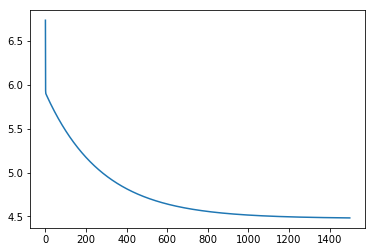

In [124]:
plt.plot( result_1d_graddesc[1] )

cf. 2.2.4 Gradient descent, pp. 7 of `ex1.pdf`:  

"Your final values for $\theta$ will also be used to make predictions on profits in areas of 35,000 and 70,000 people.  Note the way that the following lines in ex1.m uses matrix multiplication, rather than explicit summation or looping, to calculate the predictions.  
"


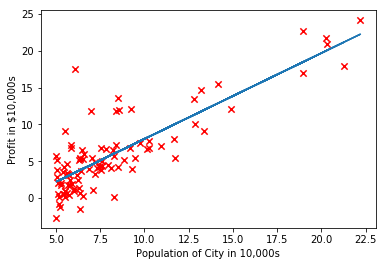

In [149]:
# Plot the linear fit

# cf. http://matthiaseisen.com/pp/patterns/p0170/ Draw a regression line with matplotlib
fig, ax = plt.subplots()

ax.set_xlabel('Population of City in 10,000s')
ax.set_ylabel('Profit in $10,000s')
#plt.plot( X_linreg, y_linreg, 'rx', markersize=10)
ax.scatter(X_linreg, y_linreg, s=40,c='r',marker='x'  )  # s is size in points^2, c is color
ax.plot( X_linreg, 
    result_1d_graddesc[0][0,0] + X_linreg * result_1d_graddesc[0][1,0],'-')

In [128]:
type(X_linreg); X_linreg.shape

(97,)

#### Part 4: Visualizing J (theta_0, theta_1) ===========================================

cf. [`surface3d_demo.py` from mplot3d tutorial - Matplotlib 2.0.0 documentation](http://matplotlib.org/mpl_examples/mplot3d/surface3d_demo.py)

In [155]:
# Grid over which we will calculate J
theta0_vals = np.arange(-10,10,20./100.)
theta1_vals = np.arange(-1,4,5./100.)
theta0_vals, theta1_vals = np.meshgrid( theta0_vals, theta1_vals )


In [156]:
print( type( theta0_vals ), type( theta1_vals) )
print( theta0_vals.shape, theta1_vals.shape )

(<type 'numpy.ndarray'>, <type 'numpy.ndarray'>)
((100, 100), (100, 100))


In [163]:
# Note to self: computeCost(X_linreg, y_linreg, theta)

# Fill out J_vals
J_vals = np.array( [[computeCost(X_linreg,y_linreg, np.vstack( np.array( [
                                theta0_vals[i,j], 
                                theta1_vals[i,j] ] ) ) ) for j in range(100) ] 
                        for i in range(100) ] )

In [168]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

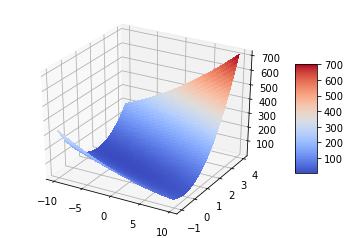

In [169]:
surf_fig = plt.figure()
surf_ax = surf_fig.gca(projection='3d')

# Plot the surface
surftheta = surf_ax.plot_surface( theta0_vals, theta1_vals, J_vals, 
                     cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Add a color bar which maps values to colors
surf_fig.colorbar(surftheta, shrink=0.5, aspect=5)

In [158]:
theta

array([[ 0.],
       [ 0.]])

In [161]:
np.vstack( np.array( [ theta0_vals[2,3], theta1_vals[2,3] ] ) )

array([[-9.4],
       [-0.9]])

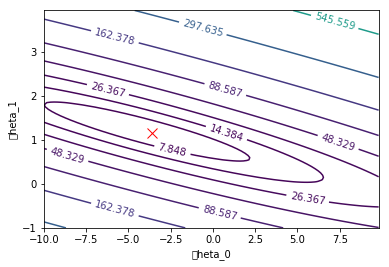

In [176]:
# Contour plot
plt.figure()
thetacontourplt = plt.contour(theta0_vals, theta1_vals, J_vals, 
                              levels=np.logspace(-2,3,20) )
plt.clabel(thetacontourplt, inline=True, fontsize=10)
plt.xlabel('\theta_0')
plt.ylabel('\theta_1')
plt.plot( result_1d_graddesc[0][0,0], result_1d_graddesc[0][1,0], 'rx', markersize=10 )
plt.show()



# Linear regression with multiple variables 

### Linear regression with multiple variables, via Week 2 Programming Exercise, `ex1.pdf` and `ex1_multi.m`

In [18]:
## Load Data
print("Loading data ... \n")

linregdata2 = pd.read_csv('./coursera_Ng/machine-learning-ex1/ex1/ex1data2.txt', header=None)
print( linregdata2.describe() )
linregdata2.head()

Loading data ... 

                 0          1              2
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000


,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [11]:
linregdata2.as_matrix([0,1])

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4],
       [1985,    4],
       [1534,    3],
       [1427,    3],
       [1380,    3],
       [1494,    3],
       [1940,    4],
       [2000,    3],
       [1890,    3],
       [4478,    5],
       [1268,    3],
       [2300,    4],
       [1320,    2],
       [1236,    3],
       [2609,    4],
       [3031,    4],
       [1767,    3],
       [1888,    2],
       [1604,    3],
       [1962,    4],
       [3890,    3],
       [1100,    3],
       [1458,    3],
       [2526,    3],
       [2200,    3],
       [2637,    3],
       [1839,    2],
       [1000,    1],
       [2040,    4],
       [3137,    3],
       [1811,    4],
       [1437,    3],
       [1239,    3],
       [2132,    4],
       [4215,    4],
       [2162,    4],
       [1664,    2],
       [2238,    3],
       [2567,    4],
       [1200,    3],
       [ 852,    2],
       [1852,    4],
       [1203,    3]])

In [19]:
X_linreg = linregdata2.as_matrix([0,1])  # pandas.DataFrame.as_matrix convert frame to its numpy-array representation
y_linreg = linregdata2.as_matrix([2])
m_linreg = len(y_linreg)  # number of training examples  
print( X_linreg.shape, type(X_linreg)) 
print( y_linreg.shape, type(y_linreg)) 
print m_linreg

((47, 2), <type 'numpy.ndarray'>)
((47, 1), <type 'numpy.ndarray'>)
47


## Feature Normalization

cf. 3.1 Feature Normalization of `ex1.pdf`

In [15]:
print( X_linreg.mean(axis=0) )
y_linreg.mean()

[ 2000.68085106     3.17021277]


340412.6595744681

In [18]:
print( X_linreg.std(axis=0) )
y_linreg.std()

[  7.86202619e+02   7.52842809e-01]


123702.53600614741

In [20]:
normedX_linreg = (X_linreg - X_linreg.mean(axis=0))/X_linreg.std(axis=0)
normedy_linreg = (y_linreg - y_linreg.mean(axis=0))/y_linreg.std(axis=0)

In [25]:
print( normedX_linreg.mean() )
print( normedX_linreg.std() )

print( normedy_linreg.mean() )
normedy_linreg.std()

1.47340768428e-16
1.0
-6.61409461479e-17


1.0

In [21]:
def featureNormalize(X):
    """
    FEATURENORMALIZE Normalizes the features in X  
    FEATURENORMALIZE(X) returns a normalized version of X where  
    the mean value of each feature is 0 and the standard deviation  
    is 1.  This is often a good preprocessing step to do when 
    working with learning algorithms.
    
    """
    # You need to set these values correctly  
    X_norm = (X-X.mean(axis=0))/X.std(axis=0)
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    
    return [X_norm, mu, sigma]
    
    

In [35]:
print( normedX_linreg.shape )
theta = np.zeros((2,1))
np.zeros((2,1)).shape

(47, 2)


(2, 1)

In [38]:
predicted_val = np.dot( normedX_linreg, theta )

In [39]:
res = predicted_val - y_linreg

In [43]:
%timeit np.dot( res.T, res )/ m_linreg

The slowest run took 28.54 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.03 µs per loop


In [44]:
%timeit (res*res).mean()

The slowest run took 17.29 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 5.25 µs per loop


In [16]:
def computeCostMulti(X,y,theta):
    """
    COMPUTECOSTMULTI Compute cost for linear regresion with multiple variables
    J = COMPUTECOSTMULTI(X, y, theta) computes the cost of using theta as the  
    parameter for linear regression to fit the data points in X and y
    """
    
    # Initialize some useful values
    m = len(y) # number of training examples   
    
    # You need to return the following variables correctly
    J = 0
    
    # Compute the cost of a particualar choice of theta, setting J to the cost
    predicted_val = np.dot(X,theta)
    res = predicted_val - y
    J = np.dot( res.T, res)/m * 0.5
    return J
    

In [53]:
np.dot( np.dot( np.linalg.inv( np.dot( normedX_linreg.T, normedX_linreg) ) , normedX_linreg.T ) , y_linreg)

array([[ 109447.79646964],
       [  -6578.35485416]])

# (Batch) gradient descent for multiple variables, multivariate (batch) gradient descent

cf. `gradientDescentMulti.m`

In [17]:
def gradientDescentMulti(X, y, theta, alpha, num_iters=1500):
    """
    GRADIENTDESCENTMULTI Performs gradient descent to learn theta
    theta = GRADIENTDESCENTMULTI(X, y, theta, alpha, num_iters) updates theta by 
    taking num_iters gradient steps with learning rate alpha
    """

    # Initialize some useful values
    m = len(y)  # number of training examples
    J_history = np.zeros((num_iters , 1) )
    
    ## assume preprocessing is needed (in the case when using pandas for DataFrame, only column of 1 is needed)
    input_X_linreg = np.hstack( (np.ones((m,1)), X))    
    
    for iter in range(num_iters):
        # perform a single gradient step on the parameter vector theta
                
        predicted_vals = np.dot( input_X_linreg, theta)
        res = predicted_vals - y 
        
        dres = res * input_X_linreg # it's the partial derivative with respect to each x_j
 
        temp = theta.flatten() - alpha * dres.mean( axis=0)
        theta = np.vstack( temp )  # this is effectively numpy's transpose from row to column vector
        
        J_history[iter] = computeCostMulti(input_X_linreg,y,theta)

    return theta, J_history


In [22]:
input_X_linreg = np.hstack( ( np.ones((m_linreg,1)), normedX_linreg ) )

In [67]:
predicted_vals_multi = np.dot( input_X_linreg, np.zeros((3,1)) )
predicted_vals_multi.shape

(47, 1)

In [69]:
res_multi = predicted_vals_multi - y_linreg

In [71]:
dres_multi = res_multi * input_X_linreg
dres_multi.shape

(47, 3)

In [73]:
( np.zeros((3,1)).flatten() - 0.5 * dres_multi.mean(axis=0) ).shape

(3,)

** Bottom line ** for serial, (batch) gradient descent for multiple variables (multiple features)

In [97]:
[normedX_linreg, mu_multi, sigma_multi] = featureNormalize(X_linreg)

In [26]:
theta = np.zeros((3,1))

In [24]:
alpha = 0.01 # Learning rate
num_iters = 400

In [101]:
[theta, J_history] = gradientDescentMulti(normedX_linreg, y_linreg, theta, alpha, num_iters)

In [27]:
%time [theta, J_history] = gradientDescentMulti(normedX_linreg, y_linreg, theta, alpha, num_iters)

CPU times: user 33.8 ms, sys: 857 µs, total: 34.6 ms
Wall time: 33.3 ms


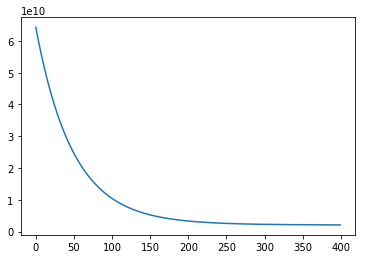

In [106]:
plt.plot( J_history)
plt.show()

In [28]:
theta

array([[ 334302.06399328],
       [  99411.44947359],
       [   3267.01285407]])

### Normal Equations  
cf. 3.3 Normal Equations, pp. 14 of `ex1.pdf`   

The closed-form solution to linear regression is  
   
$$   
\theta = (X^T X)^{-1}X^T \mathbf{y}  
$$


In [108]:
def normalEqn(X,y):
    """
    NORMALEQN Computes the closed-form solution to linear regression  
    NORMALEQN(X,y) computes the closed-form solution to linear  
    regression using the normal equations.   
    """
    
    normX = np.dot( X.T, X)
    normXinverse = np.linalg.inv( normX )
    theta = np.dot( np.dot( normXinverse, X.T),y)
    return theta
    

In [110]:
# Add intercept term to X

X_linreg_w_intercept = np.hstack( (np.ones((m_linreg,1)), X_linreg)) 



In [111]:
normalEqn( X_linreg_w_intercept, y_linreg)

array([[ 89597.9095428 ],
       [   139.21067402],
       [ -8738.01911233]])

#### Linear Regression with Multiple Variables quiz  

cf. https://www.coursera.org/learn/machine-learning/exam/7pytE/linear-regression-with-multiple-variables

In [113]:
midterm_exampow2 = np.array( [ 7921, 5184, 8836, 4761])

In [119]:
midterm_exampow2min = midterm_exampow2.min()
midterm_exampow2max = midterm_exampow2.max()
midterm_exampow2range = float( midterm_exampow2max - midterm_exampow2min )
midterm_exampow2mean = midterm_exampow2.mean()

In [118]:
midterm_exampow2 / midterm_exampow2range

array([ 1.94380368,  1.27214724,  2.16834356,  1.16834356])

In [121]:
(midterm_exampow2 - midterm_exampow2mean) / midterm_exampow2range

array([ 0.30564417, -0.36601227,  0.53018405, -0.46981595])

Took the quiz today for Week 2.  20170209

EY : Diabetes Sample data from sci-kit learn, `sklearn`

In [29]:
# Load the diabetes dataset
diabetes = sklearn.datasets.load_diabetes()

In [30]:
diabetes_X = diabetes.data
diabetes_Y = diabetes.target

In [31]:
#diabetes_X1 = diabetes_X[:,np.newaxis,2]
diabetes_X1 = diabetes_X[:,np.newaxis, 2]

In [32]:
theta = np.zeros((2,1))

In [34]:
%time linreg_diabetes_result = gradientDescent(diabetes_X1.flatten(), diabetes_Y.flatten(),theta,0.01,num_iters=10000)

CPU times: user 626 ms, sys: 0 ns, total: 626 ms
Wall time: 622 ms


In [35]:
print(linreg_diabetes_result)

(array([[ 152.13348416],
       [ 192.24054374]]), array([ 14306.90606965,  14081.15393709,  13859.89335591, ...,
         2593.86599428,   2593.83664449,   2593.80729603]))


In [36]:
theta = np.zeros((diabetes_X.shape[1]+1,1))

In [42]:
%time linreg_diabetes_result = gradientDescentMulti(diabetes_X, np.vstack(diabetes_Y),theta,0.01,num_iters=10000)

CPU times: user 852 ms, sys: 0 ns, total: 852 ms
Wall time: 848 ms


In [38]:
diabetes_X.shape

(442, 10)

In [40]:
theta.shape

(11, 1)

In [41]:
diabetes_Y.shape

(442,)

# Logistic regression

cf. [Coursera Programming Assignment: Logistic Regression](https://www.coursera.org/learn/machine-learning/programming/ixFof/logistic-regression)

In [43]:
os.listdir( './coursera_Ng/machine-learning-ex2/' )

['ex2.pdf', 'ex2']

In [44]:
os.listdir( './coursera_Ng/machine-learning-ex2/ex2' )

['submit.m',
 'ex2.m',
 'sigmoid.m',
 'plotData.m',
 'mapFeature.m',
 'ex2_reg.m',
 'ex2data1.txt',
 'predict.m',
 'lib',
 'costFunctionReg.m',
 'costFunction.m',
 'ex2data2.txt',
 'plotDecisionBoundary.m']

[`pandas.read_csv`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html), Parameters: header: defaults to 0, if no names are passed, but we need to set it to `None` so not to include the first row

### 1.1 Visualizing the data   

cf. pp. 3, 'ex2.pdf' Week 3 Programming Assigment: Logistic Regression for Coursera's Machine Learning Introduction by Ng

In [45]:
## ================================== Part 2: Plotting =====================================
print("Plotting Data ... \n")
logregdata = pd.read_csv('./coursera_Ng/machine-learning-ex2/ex2/ex2data1.txt', header=None)

Plotting Data ... 



In [47]:
logregdata.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [ ]:
plt.scatter( logregdata.as_matrix([0]) , logregdata.as_matrix([1]) 

In [ ]:
df.loc[df['column_name'] == some_value]

In [51]:
logregdata.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [52]:
# Find Indices of Positive and Negative Examples
logregdata.loc[ logregdata[2] == 0]

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
5,45.083277,56.316372,0
10,95.861555,38.225278,0
11,75.013658,30.603263,0
14,39.538339,76.036811,0
17,67.946855,46.678574,0
20,67.372028,42.838438,0
22,50.534788,48.855812,0


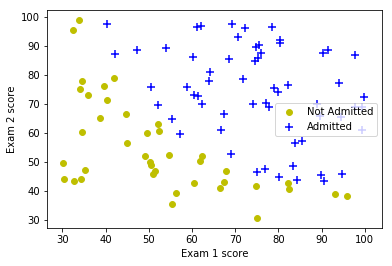

In [79]:
# First, 
# Find Indices of Positive and Negative Examples

# neg, negative examples, y == 0
plt.scatter( logregdata.loc[ logregdata[2] == 0].as_matrix([0]) , 
             logregdata.loc[ logregdata[2] == 0].as_matrix([1]), s=35,c='y',marker='o' , label='Not Admitted')
# parameters for scatter: s : size in points^2, c : color, marker : MarkerStyle, default 'o'

# pos. positive examples, y == 1
plt.scatter( logregdata.loc[ logregdata[2] == 1].as_matrix([0]) , 
             logregdata.loc[ logregdata[2] == 1].as_matrix([1]), s=75,c='b',marker='+' , label='Admitted')
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=5)
plt.show()

cf. `sigmoid.m`  

The sigmoid function is defined as  
   
$$   
g(z) = \frac{1}{1 + e^{-z} }   
$$   

In [63]:
def sigmoid(z):
    """
    SIGMOID Compute sigmoid function
        g = SIGMOID(z) computes the sigmoid of z
        
    """
    g = (1. + np.exp(-z))
    g = 1./g
    return g
    
    

In [64]:
sigmoid( np.array([1,2,3]))

array([ 0.73105858,  0.88079708,  0.95257413])

### Cost function and gradient (for logistic regression)  

cf. 1.2.2 Cost function and gradient, pp. 4, `ex2.pdf`  

$$  
J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)} \log{ (h_{\theta}(x^{(i)})) }  - (1-y^{ (i) } ) \log{ (1- h_{\theta}(x^{ (i)} ) ) }\right]
$$  

Remember that, for logistic regression hypothesis, 
$$  
h_{\theta}(x) = g(\theta^Tx )  
$$

with $g$ being the sigmoid function, defined as  
$$  
g(z) = \frac{1}{ 1 + e^{-z} }  
$$  

In [91]:
def costFunction(theta, X,y):
    """
    COSTFUNCTION Compute cost and gradient for logistic regression  
    J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the  
    parameter for logistic regression and the gradient of the cost  
    w.r.t. to the parameters  

    RETURNS 
    =======
    [J, grad]
    
    """   
    
    # Initialize some useful values  
    m = len(y)  # number of training examples
    
    # You need to return the following variables correctly
    J = 0 
    grad = np.zeros( len(theta))

    # Compute the cost of a particular choice of theta.  
    # You should set J to the cost.  
    # Compute the partial derivatives and set grad to the partial 
    # derivatives of the cost w.r.t. each parameter in theta  

    ## assume preprocessing is needed (in the case when using pandas for DataFrame, only column of 1 is needed)
    input_X_linreg = np.hstack( (np.ones((m,1)), X))    
    
    predicted_vals = np.dot( input_X_linreg, theta )  # h_{\theta}  
    predicted_vals = sigmoid( predicted_vals )
    
    interpolation = -y * np.log( predicted_vals ) - (1. - y) * np.log( 1. - predicted_vals ) 
    
    J = interpolation.mean()  

    res = predicted_vals - y # res for residual
    dJ = res * input_X_linreg # res * x_j^{(i)}
    grad = dJ.mean(axis=0)
    
    return [J, grad]
    
        

In [92]:
len( np.vstack( np.zeros(3) ) )

3

In [70]:
np.log( logregdata.as_matrix([0])  ).mean()

#logregdata.loc[ logregdata[2] == 1].as_matrix([0])

4.1352906364311535

In [93]:
## ======================= Part 2: Compute Cost and Gradient ==============================  

d = logregdata.as_matrix().shape[1] - 1

# Initialize fitting parameters
initial_theta = np.zeros( (d + 1,1) )

In [94]:
X = logregdata.as_matrix( range(d) )
y = logregdata.as_matrix( [d])
# Compute and display initial cost and gradient  
[cost, grad] = costFunction( initial_theta , X, y )

In [96]:
print("Cost at initial theta (zeros): %f\n" % cost )  
print("Expected cost (approx): 0.693\n") 
print("Gradient at initial theta (zeros): \n")
#print(" %f \n" % grad)
print(grad)
print("Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n")


Cost at initial theta (zeros): 0.693147

Expected cost (approx): 0.693

Gradient at initial theta (zeros): 

[ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628



In [97]:
# Compute and display cost and gradient with non-zero theta
test_theta = np.vstack( np.array( [-24., 0.2, 0.2]) )
[cost, grad]  = costFunction( test_theta, X,y)

In [98]:
print("\nCost at test theta: %f\n" % cost)
print("Expected cost (approx): 0.218\n")
print("Gradient at test theta: \n")
print( grad)
print("Expected gradients (approx): \n 0.043\n 2.586\n 2.647\n") 


Cost at test theta: 0.218330

Expected cost (approx): 0.218

Gradient at test theta: 

[ 0.04290299  2.56623412  2.64679737]
Expected gradients (approx): 
 0.043
 2.586
 2.647



In [99]:
## ===================== Part 3: optimizing using fminunc 
# 

### Regularized logistic regression; 2 Regularized logistic regression

#### Cost function and gradient; Regularized logistic regression  

cf. 2.3 Cost function and gradient

Recall regularized cost function in logistic regression    
$$   
J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[-y^{(i)} \log{ (h_{\theta}(x^{(i)} )) } - (1-y^{(i)} )\log{ (1-h_{\theta}(x^{(i)} )) } \right] + \frac{ \lambda}{ 2m } \sum_{j=1}^n \theta_j^2
  $$  


In [107]:
def costFunctionReg(theta, X,y,lambda_val):
    """
    COSTFUNCTIONREG Compute cost and gradient for logistic regression with regularization  
    J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the  
    parameter for regularized logistic regression and the gradient of the cost  
    w.r.t. to the parameters  

    RETURNS 
    =======
    [J, grad]
    
    """   
    
    # Initialize some useful values  
    m = len(y)  # number of training examples
    
    # You need to return the following variables correctly
    J = 0 
    grad = np.zeros( len(theta))

    # Compute the cost of a particular choice of theta.  
    # You should set J to the cost.  
    # Compute the partial derivatives and set grad to the partial 
    # derivatives of the cost w.r.t. each parameter in theta  

    ## assume preprocessing is needed (in the case when using pandas for DataFrame, only column of 1 is needed)
    input_X_linreg = np.hstack( (np.ones((m,1)), X))    
    
    predicted_vals = np.dot( input_X_linreg, theta )  # h_{\theta}  
    predicted_vals = sigmoid( predicted_vals )
    
    interpolation = -y * np.log( predicted_vals ) - (1. - y) * np.log( 1. - predicted_vals ) 
    
    J = interpolation.mean()  

    # regularized term 
    theta1 = theta[1:]  # "Note that you should not regularize the parameter $\theta_0$"
    reg_term = np.inner( theta1.flatten(), theta1.flatten() ) # \sum_{j=1}^n \theta_j^2
    reg_term = lambda_val * (1./(2. * m)) * reg_term
    
    J += reg_term
    
    res = predicted_vals - y # res for residual
    dJ = res * input_X_linreg # res * x_j^{(i)}
    grad = dJ.mean(axis=0)
    
    # regularization term for gradient : grad_reg_term
    grad_reg_term = np.zeros( len(theta))
    grad_reg_term[1:] = theta[1:]
    grad_reg_term *= lambda_val / float(m)
    
    grad += grad_reg_term
    
    return [J, grad]
    

In [102]:
initial_theta[1:].shape

(2, 1)

In [106]:
np.inner( initial_theta.flatten(), initial_theta.flatten())

0.0

# Multi-class Classification

cf. `ex3.pdf`, Programming Exercise 3: Multi-class Classification and Neural Networks, Machine Learning, 

1 Multi-class Classification

In [108]:
os.getcwd()

'/home/topolo/PropD/MLgrabbag'

In [109]:
os.listdir( './coursera_Ng/machine-learning-ex3/' )

['ex3.pdf', 'ex3']

In [110]:
os.listdir( './coursera_Ng/machine-learning-ex3/ex3/' )

['ex3data1.mat',
 'submit.m',
 'sigmoid.m',
 'lrCostFunction.m',
 'predictOneVsAll.m',
 'oneVsAll.m',
 'predict.m',
 'ex3.m',
 'lib',
 'displayData.m',
 'ex3_nn.m',
 'fmincg.m',
 'ex3weights.mat']

In [14]:
# Load saved matrices from file 
multiclscls_data = scipy.io.loadmat('./coursera_Ng/machine-learning-ex3/ex3/ex3data1.mat')

In [115]:
multiclscls_data.keys()

['y', 'X', '__version__', '__header__', '__globals__']

In [119]:
print( type(multiclscls_data['y'] )) 
print( multiclscls_data['y'].shape )
print(type(multiclscls_data['X']))
print( multiclscls_data['X'].shape )


<type 'numpy.ndarray'>
(5000, 1)
<type 'numpy.ndarray'>
(5000, 400)


In [9]:
def sigmoid(z):
    """
    SIGMOID COmpute sigmoid function
    J = SIGMOID(z) computes the sigmoid of z.
    """
    g = 1.0 / (1.0 + np.exp(-z))
    return g


cf. 1.3 Vectorizing Logistic Regression, 1.3.1 Vectorizing the cost function pp. 4, `ex3.pdf`

Recall (*unregularized*) logistic regression:  
  
$$   
J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{ (i)} \log{ (h_{\theta}(x^{(i)} ) ) } - (1-y^{(i)} )\log{ (1-h_{\theta}(x^{(i)} ) ) }   \right]
$$  


In [36]:
def lrCostFunction(theta, X, y, lambda_val):
    """
    LRCOSTFUNCTION Compute cost and gradient for logistic regression with 
    regularization
    J = LRCOSTFUNCTION(theta, X, y,lambda_val) computes the cost of using theta as the  
    parameter for regularized logistic regression and the gradient of the cost  
    w.r.t. to the parameters  

    theta
    @type  : numpy array of matrix size d+1,1 i.e. theta \in \mathbb{R}^{d+1}
    @param : "weights"

    RETURNS 
    =======
    [J, grad]
    
    """   
    
    # Initialize some useful values  
    m = len(y)  # number of training examples
    
    # You need to return the following variables correctly
    J = 0 
    grad = np.zeros( len(theta))

    # Compute the cost of a particular choice of theta.  
    # You should set J to the cost.  
    # Compute the partial derivatives and set grad to the partial 
    # derivatives of the cost w.r.t. each parameter in theta  

    ## assume preprocessing is needed (in the case when using pandas for DataFrame, only column of 1 is needed)
    input_X_linreg = np.hstack( (np.ones((m,1)), X))    
    
    predicted_vals = np.dot( input_X_linreg, theta )  # h_{\theta}  
    predicted_vals = sigmoid( predicted_vals )
    
    interpolation = -y * np.log( predicted_vals ) - (1. - y) * np.log( 1. - predicted_vals ) 
    
    J = interpolation.mean()  

    res = predicted_vals - y # res for residual
#    dJ = res * input_X_linreg # res * x_j^{(i)}
#    grad = dJ.mean(axis=0)
 
    dJ = np.dot( input_X_linreg.T , res ) 
    
    
        # regularized term 
    theta1 = theta[1:]  # "Note that you should not regularize the parameter $\theta_0$"
    reg_term = np.inner( theta1.flatten(), theta1.flatten() ) # \sum_{j=1}^n \theta_j^2
    reg_term = lambda_val * (1./(2. * m)) * reg_term
    
    J += reg_term
    
#    res = predicted_vals - y # res for residual
#    dJ = res * input_X_linreg # res * x_j^{(i)}
#    grad = dJ.mean(axis=0)
    
    # regularization term for gradient : grad_reg_term
    grad_reg_term = np.vstack( np.zeros( len(theta)) )
    grad_reg_term[1:] = theta[1:]
    grad_reg_term *= lambda_val / float(m)
    
    grad = dJ + grad_reg_term
    
    return [J, grad]


In [123]:
y = multiclscls_data['y']
X = multiclscls_data['X']


In [7]:
theta_t = np.vstack( np.array( [-2, -1, 1, 2]) )
X_t = np.array( [i/10. for i in range(1,16)]).reshape((3,5)).T
#X_t = np.hstack( ( np.ones((5,1)), X_t) ) # no need to preprocess the input data X with column of 1's
y_t = np.vstack( np.array( [1,0,1,0,1]))

In [152]:
[J_t, grad_t] = lrCostFunction( theta_t, X_t, y_t, 3); 
print( J_t)  # Expected cost: 2.534819

2.53481939611


Let's try to "vectorize" this more.  

In [6]:
def lrCostFunction(theta, X, y, lambda_val):
    """
    LRCOSTFUNCTION Compute cost and gradient for logistic regression with 
    regularization
    J = LRCOSTFUNCTION(theta, X, y,lambda_val) computes the cost of using theta as the  
    parameter for regularized logistic regression and the gradient of the cost  
    w.r.t. to the parameters  

    theta
    @type  : numpy array of matrix size d+1,1 i.e. theta \in \mathbb{R}^{d+1}
    @param : "weights"

    RETURNS 
    =======
    [J, grad]
    
    """   
    
    # Initialize some useful values  
    m = len(y)  # number of training examples
    
    # You need to return the following variables correctly
    J = 0 
    grad = np.zeros( len(theta))

    # Compute the cost of a particular choice of theta.  
    # You should set J to the cost.  
    # Compute the partial derivatives and set grad to the partial 
    # derivatives of the cost w.r.t. each parameter in theta  

    ## assume preprocessing is needed (in the case when using pandas for DataFrame, only column of 1 is needed)
    input_X = np.hstack( (np.ones((m,1)), X))    
    
    z = np.dot( input_X, theta )    
    predicted_vals = sigmoid( z ) # h_{\theta}
    
    interpolation = - np.dot( y.T, np.log( predicted_vals) ) - np.dot( (1. -y).T, np.log( 1. - predicted_vals ))
    
    J = interpolation[0][0] /float(m) 

    res = predicted_vals - y # res for residual
 
    dJ = np.dot( input_X.T , res ) 
    
    
        # regularized term 
    theta1 = theta[1:]  # "Note that you should not regularize the parameter $\theta_0$"
    reg_term = np.inner( theta1.flatten(), theta1.flatten() ) # \sum_{j=1}^n \theta_j^2
    reg_term = lambda_val * (1./(2. * m)) * reg_term
    
    J += reg_term
    
    # regularization term for gradient : grad_reg_term
    grad_reg_term = np.vstack( np.zeros( len(theta)) )
    grad_reg_term[1:] = theta[1:]
    grad_reg_term *= lambda_val / float(m)
    
    grad = dJ + grad_reg_term
    
    return [J, grad]

In [10]:
[J_t, grad_t] = lrCostFunction( theta_t, X_t, y_t, 3); 
print( J_t)  # Expected cost: 2.534819

2.53481939611


In [176]:
X_t.shape

(5, 3)

In [160]:
input_X_t = np.hstack( (np.ones((5,1)), X_t))  
z = np.dot( input_X_t, theta_t ) 
predicted_vals = sigmoid( z ) 

In [163]:
print( y_t.shape )
print( predicted_vals.shape )

(5, 1)
(5, 1)


In [167]:
.1 - y_t

array([[-0.9],
       [ 0.1],
       [-0.9],
       [ 0.1],
       [-0.9]])

In [165]:
y_t

array([[1],
       [0],
       [1],
       [0],
       [1]])

In [168]:
interpolation = - np.dot( y_t.T, np.log( predicted_vals) ) - np.dot( (1. -y_t).T, np.log( 1. - predicted_vals ))

In [173]:
interpolation[0][0]

3.6740969805487205

In [11]:
grad_t

array([[ 0.73280684],
       [-0.34279206],
       [ 1.22361136],
       [ 2.19001478]])

### One-vs-all Classification  
cf. 1.4 One-vs-all Classification, pp.8 `ex3.pdf`

In [15]:
y = multiclscls_data['y']
X = multiclscls_data['X']

In [17]:
num_labels= 10
lambda_val = 0.1

In [20]:
from scipy import optimize

In [42]:
print( X.shape )
#print( np.zeros( (5, 8) ) )
#initial_theta = np.vstack( np.zeros( ( X.shape[1]+1, 1)) )

(5000, 400)


In [48]:
theta_t =  np.array( [-2, -1, 1, 2]) 
X_t = np.array( [i/10. for i in range(1,16)]).reshape((3,5)).T
#X_t = np.hstack( ( np.ones((5,1)), X_t) ) # no need to preprocess the input data X with column of 1's
y_t = np.vstack( np.array( [1,0,1,0,1]))
input_X_t = np.hstack( (np.ones(( len(y_t), 1)), X_t))

In [62]:
print( np.dot( input_X_t, theta_t).shape )
print( np.dot( y_t.T, np.log( sigmoid( np.dot( input_X_t, theta_t) ) ))[0]  )
print( np.dot( input_X_t.T, y_t.flatten() ) )
np.inner( theta_t[1:].flatten(), theta_t[1:].flatten() )
theta_t[1:]

(5,)
-0.891934651984
[ 3.   0.9  2.4  3.9]


array([-1,  1,  2])

In [74]:
def lrCostFunction(theta, X, y, lambda_val):
    """
    LRCOSTFUNCTION Compute cost and gradient for logistic regression with 
    regularization
    J = LRCOSTFUNCTION(theta, X, y,lambda_val) computes the cost of using theta as the  
    parameter for regularized logistic regression and the gradient of the cost  
    w.r.t. to the parameters  

    theta
    @type  : numpy array of matrix size (d+1,) i.e. theta \in \mathbb{R}^{d+1}
    @param : "weights"

    X
    @type  : numpy array of matrix size (m,d), i.e. X \in \text{Mat}_{\mathbb{R}}( d,m)
    @param : input data i.e. input training data i.e. training examples

    y
    @type  : numpy array of matrix size (m,1), i.e. X \in \mathbb{R}^m
    @param : test data i.e. test values i.e. test examples

    RETURNS 
    =======
    J
    
    """   
    
    # Initialize some useful values  
    m = len(y)  # number of training examples
    
    # You need to return the following variables correctly
    J = 0 
    grad = np.zeros( len(theta))

    # Compute the cost of a particular choice of theta.  
    # You should set J to the cost.  
    # Compute the partial derivatives and set grad to the partial 
    # derivatives of the cost w.r.t. each parameter in theta  

    ## assume preprocessing is needed (in the case when using pandas for DataFrame, only column of 1 is needed)
    input_X = np.hstack( (np.ones((m,1)), X))     
    
    z = np.dot( input_X, theta )    # matrix size or dim. of (m,) dim(z) = m x 0
    predicted_vals = sigmoid( z ) # h_{\theta}
    
    interpolation = - np.dot( y.T, np.log( predicted_vals) ) - np.dot( (1. -y).T, np.log( 1. - predicted_vals ))  # matrix size or dim. of (1,), i.e. dim(interpolation) = 1x0 
    
    J = interpolation[0] /float(m)  # scalar value

    res = predicted_vals - y.flatten() # res for residual, matrix size or dim. of (m,) dim(res) = mx0
 
    dJ = np.dot( input_X.T , res ) # matrix size or dim. of (d+1,), i.e. dim(dJ) = (d+1)x0
    
    
        # regularized term 
    theta1 = theta[1:]  # "Note that you should not regularize the parameter $\theta_0$"
    reg_term = np.inner( theta1.flatten(), theta1.flatten() ) # \sum_{j=1}^n \theta_j^2
    reg_term = lambda_val * (1./(2. * m)) * reg_term
    
    J += reg_term
    
    # regularization term for gradient : grad_reg_term
    grad_reg_term = np.zeros( theta.shape ) # matrix size or dim. of (d+1,) dim(grad_reg_term) = (d+1)x0
    grad_reg_term[1:] = theta[1:]
    grad_reg_term = lambda_val / float(m)
    
    grad = dJ + grad_reg_term # matrix size or dim. of (d+1,), i.e. dim(grad) = (d+1)x0
    
    return J

In [75]:
def oneVsAll(X, y, num_labels, lambda_value):  
    """
    ONEVSALL trains multiple logistic regression classifiers and returns all 
    the classifiers in a matrix all_theta, where the i-th row of all_theta 
    corresponds to the classifier for label i 
    
    [all_theta] = ONEVSALL(X, y, num_labels, lambda_value) trains num_labels 
    logistic regression classifiers and returns each of these classifiers 
    in a matrix all_theta, where the i-th row of all_theta corresponds 
    to the classifier for label i
    """
    
    # Some useful variables
    m = X.shape[0]
    n = X.shape[1]
    
    # You need to return the following variables correctly
#    all_theta = np.zeros( (num_labels, n+1) )
    all_theta = []

    # Set Initial theta
    initial_theta = np.zeros( (n+1,1))
    
    
    for c in range(1,num_labels+1): 

        # Use y == c to obtain a vector of 1's and 0's that tell you whether the ground truth is true/false for this class.
        y_c = (y == c).astype('float32')
        
        # scipy.optimize.fmin_cg - scipy.optimize.fmin_cg(f, x0, fprime=None,args=()), fprime a function that returns the gradient of f
        theta_c = optimize.fmin_cg(lrCostFunction, initial_theta, args=(X,y_c,lambda_value) )
        all_theta.append( theta_c)
    return all_theta


In [79]:
all_theta_digits = oneVsAll( X,y,10, 0.1)

Optimization terminated successfully.
         Current function value: 0.013129
         Iterations: 102
         Function evaluations: 155961
         Gradient evaluations: 387
Optimization terminated successfully.
         Current function value: 0.050816
         Iterations: 247
         Function evaluations: 304668
         Gradient evaluations: 756
Optimization terminated successfully.
         Current function value: 0.057614
         Iterations: 206
         Function evaluations: 243412
         Gradient evaluations: 604
Optimization terminated successfully.
         Current function value: 0.033089
         Iterations: 179
         Function evaluations: 234546
         Gradient evaluations: 582
Optimization terminated successfully.
         Current function value: 0.054466
         Iterations: 219
         Function evaluations: 261547
         Gradient evaluations: 649
Optimization terminated successfully.
         Current function value: 0.018262
         Iterations: 167
     

In [89]:
print(type(all_theta_digits))
print(len(all_theta_digits))
for i in range( len(all_theta_digits)):
    print( all_theta_digits[i].shape )
    print( all_theta_digits[i][:3], all_theta_digits[i][-3:] )

<type 'list'>
10
(401,)
(array([ -3.07801828e+00,   0.00000000e+00,  -5.51881869e-08]), array([  6.34010230e-03,   2.66451854e-07,   0.00000000e+00]))
(401,)
(array([-3.72771815,  0.        ,  0.        ]), array([ 0.02040046, -0.0022795 ,  0.        ]))
(401,)
(array([-5.69661714,  0.        ,  0.        ]), array([ -7.13803499e-05,   6.83367055e-07,   0.00000000e+00]))
(401,)
(array([-2.23890676,  0.        ,  0.        ]), array([  9.51420678e-04,   2.14386719e-05,   0.00000000e+00]))
(401,)
(array([ 0.43824521,  0.        ,  0.        ]), array([ -2.55280506e-03,  -7.91743268e-06,   0.00000000e+00]))
(401,)
(array([-4.20107646,  0.        ,  0.        ]), array([ -1.15748375e-04,   1.48745968e-05,   0.00000000e+00]))
(401,)
(array([ -2.28398560e+00,  -8.97670935e-08,   0.00000000e+00]), array([-0.00523698,  0.00061772,  0.        ]))
(401,)
(array([-0.24094146,  0.        ,  0.        ]), array([ -1.20724092e-06,   1.25660765e-07,   0.00000000e+00]))
(401,)
(array([-5.60433128,  0.

In [95]:
print( np.array( all_theta_digits).shape )
print( X.shape )
input_X = np.hstack( (np.ones((X.shape[0], 1)), X)) 
z = np.dot( input_X , np.array( all_theta_digits).T)

(10, 401)
(5000, 400)


In [97]:
h_theta = sigmoid(z)
h_theta.shape

(5000, 10)

In [100]:
predicted_cls = np.argmax( h_theta, axis=1 )

In [101]:
predicted_cls.shape

(5000,)

In [93]:
print( y.shape )

(5000, 1)


In [ ]:
def predictOneVsAll( all_theta, X):
    """
    PREDICT Predict the label for a trained one-vs-all classifier.  The labels 
    are in the range 1..K, where K = all_theta.shape[0], i.e. y \in \lbrace 1 \dots K \rbrace
    p = PREDICTONEVSALL(all_theta, X) will return a vector of predictions 
    for each example in the matrix X.  Note that X contains the examples in 
    rows.  all_theta is a matrix where the i-th row is a trained logistic 
    regression theta vector for the i-th class.  

    RETURNS:
    @type list of 2: numpy array of dims. (m,) 
    """
    
    m = X.shape[0]  # total number of training examples
    num_labels = all_theta.shape[0] # total number of "classes", i.e. y \in \lbrace 1 \dots K \rbrace and num_labels=K
    
    # Add ones to the X data matrix, to include an "intercept"
    input_X = np.hstack( (np.ones( (m,1) ), X))
    z = np.dot( input_X, np.array( all_theta))
    h_theta = sigmoid(z)
    predicted_cls = np.argmax( h_theta, axis=1)

    predicted_cls_p1 = predicted_cls + 1 # just because of how Python/numpy numbers from 0, as opposed to from 1
    return predicted_cls_pl
    
    
    
    

In [107]:


sum( [predicted_cls[j] == y[j] for j in range(len(y))] )
print( pd.DataFrame( predicted_cls).describe() )
print( pd.DataFrame( y).describe() )
predicted_cls_p1 = predicted_cls + 1

                 0
count  5000.000000
mean      4.276000
std       2.887402
min       0.000000
25%       2.000000
50%       4.000000
75%       6.000000
max       9.000000
                 0
count  5000.000000
mean      5.500000
std       2.872569
min       1.000000
25%       3.000000
50%       5.500000
75%       8.000000
max      10.000000


In [114]:
print( predicted_cls[200:240] )
print( predicted_cls_p1[200:240] )
print( y[200:240])
sum( [predicted_cls_p1[j]==y[j] for j in range(len(y))] )[0]/ float( len(y) )

[9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9]
[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10]
[[10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]]


0.9032

In [80]:
%%timeit all_theta_digits = oneVsAll( X,y,10, 0.1)

UsageError: %%timeit is a cell magic, but the cell body is empty. Did you mean the line magic %timeit (single %)?

In [78]:
print(y )
print( (y == 3).astype('float32') )
optimize.fmin_cg(lrCostFunction, np.zeros( X.shape[1]+1) ,args=(X, (y==3).astype('float32'), .1))

[[10]
 [10]
 [10]
 ..., 
 [ 9]
 [ 9]
 [ 9]]
[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
Optimization terminated successfully.
         Current function value: 0.057614
         Iterations: 206
         Function evaluations: 243412
         Gradient evaluations: 604


array([ -5.69661714e+00,   0.00000000e+00,   0.00000000e+00,
        -4.01284926e-05,  -2.47551612e-03,   4.10334729e-02,
         2.70295169e-01,  -1.30353249e-01,  -3.71582730e-03,
         4.91232762e-02,  -3.25279844e-04,   1.32510983e-03,
        -3.44975273e-02,  -1.05877813e-01,   1.51535994e-01,
         2.18228892e-01,  -1.41630710e-02,  -1.69427455e-03,
         2.10349343e-05,   1.56420018e-05,   0.00000000e+00,
        -2.07918174e-07,  -9.07518375e-07,   7.88374433e-05,
         5.86444962e-03,  -4.31760506e-02,  -9.42938495e-01,
        -1.72838412e+00,  -1.40106030e+00,  -8.06810080e-01,
        -2.37130404e-02,  -1.42925394e-02,   4.23159221e-01,
         1.14461036e+00,  -1.73722756e+00,  -2.44023875e+00,
         1.03629377e-01,  -7.31902231e-02,  -1.33303354e-01,
        -1.57950725e-02,   2.26803900e-03,   5.29072595e-07,
        -1.77040623e-03,  -1.00000993e-02,   2.28866213e-01,
         1.91757983e+00,   2.85682657e+00,   1.70339321e+00,
         2.19173114e+00,

In [46]:
np.asarray((0,0)).shape

(2,)

# Neural Networks

In [81]:
ex3weightsdata = scipy.io.loadmat('./coursera_Ng/machine-learning-ex3/ex3/ex3weights.mat')

## Feedforward Propagation and Prediction

cf. 2.2 Feedforward Propagation and Prediction, `ex3.pdf`

In [115]:
Theta1 = ex3weightsdata['Theta1']
Theta2 = ex3weightsdata['Theta2']
print( Theta1.shape )
print( Theta2.shape )


(25, 401)
(10, 26)


In [ ]:
a = []
a.append( )

In [125]:
def predict(Theta1, Theta2, X):
    """
    PREDICT predict the label of an input given a trained neural network  
    p = PREDICT(Theta1, Theta2, X) outputs the predicted label of X given the 
    trained weights of a neural network (Theta1, Theta2)

    PARAMETERS
    ==========
    Theta1
    @type numpy array of size dims. s_2 x (d+1), where s_2 is the number of "units" of "hidden layer", layer 2, with d = number of features
    @param Theta1
    
    Theta2
    @type numpy array of size dims. M x (s_2 + 1), M=number of output classes
    @param Theta2
    """
    
    # Useful values 
    m = X.shape[0] # total number of training examples, m
    num_labels = Theta2.shape[0] # number of classes, i.e. output y \in \lbrace 1, \dots, num_labels \rbrace
    
    ## assume preprocessing is needed (in the case when using pandas for DataFrame, only column of 1 is needed)
    input_X = np.hstack( (np.ones((m,1)), X)) # size dims. (m,d+1) i.e. m x (d+1)
    
    a_lst = [] # "activation"
    a =  input_X  # a_0^{(1)} already added in input_X step as a_0^{(1)}=1, # a of size dims. (m,d+1)i.e. m x (d+1)
    a_lst.append(a)
    
    z = np.dot( Theta1, a.T ) # size dims. s_2 x m
    a = sigmoid(z)  
    a = np.vstack( ( np.ones((1,m)), a)) # size dims. (s_2 +1) x m i.e. ((s_2+1),m)
    a_lst.append(a) 
    
    z = np.dot( Theta2, a)
    a = sigmoid(z)
    
    predicted_vals = np.argmax( a, axis =0)
    predicted_vals_p1 = predicted_vals + 1 # add 1 to "scale" outputs to predict y, since Python/numpy counts from 0
    return predicted_vals_p1
        

In [128]:
predict_nn = predict(Theta1,Theta2, X) 
print( predict_nn.shape)
pd.DataFrame(predict_nn).describe()

(5000,)


,0
count,5000.000000
mean,5.504000
std,2.874933
min,1.000000
25%,3.000000
50%,6.000000
75%,8.000000
max,10.000000


In [129]:
sum( [predict_nn[j]==y[j] for j in range(len(y))] )[0]/ float( len(y) )


0.97519999999999996

In [122]:
m = X.shape[0]; print(m)  
num_labels = Theta2.shape[0]; print( num_labels )
input_X = np.hstack( (np.ones( (m,1)), X))
a_lst = []
a = input_X
a_lst.append(a)

z=np.dot( Theta1, a.T)
a=sigmoid(z)
a=np.vstack(( np.ones((1,m)),a)) 
a_lst.append(a)

z = np.dot( Theta2, a)
a=sigmoid(z) ; print a.shape


5000
10
(10, 5000)


In [124]:
print( np.argmax( a,axis=0).shape ) 
pd.DataFrame( np.argmax(a,axis=0) ).describe()

(5000,)


,0
count,5000.000000
mean,4.504000
std,2.874933
min,0.000000
25%,2.000000
50%,5.000000
75%,7.000000
max,9.000000


cf. `nnCostFunction.m`

In [137]:
## ==================== Part 1: Loading and Visualizing Data ==============================  
# We start the exercise by first loading and visualizing the dataset.  
# You will be working with a dataset that contains handwritten digits.  
#  

# Load Training Data
print("Loading and Visualizing Data ... \n")
ex4data1 = scipy.io.loadmat('./coursera_Ng/machine-learning-ex4/ex4/ex4data1.mat')

Loading and Visualizing Data ... 



In [142]:
ex4data1['X'] == X
ex4data1['y'] == y

array([[ True],
       [ True],
       [ True],
       ..., 
       [ True],
       [ True],
       [ True]], dtype=bool)

In [152]:
ex4data1['y'].shape

(5000, 1)

`ex4.m`

In [136]:
# Load the weights into variables Theta1 and Theta2

In [130]:
ex4weightsdata = scipy.io.loadmat('./coursera_Ng/machine-learning-ex4/ex4/ex4weights.mat')

In [135]:
Theta1 = ex4weightsdata['Theta1'] 
Theta2 = ex4weightsdata['Theta2'] 


In [143]:
print( Theta1.shape )  # size dims. s_2 x ( d+1)
print( Theta2.shape )  # size dims. M x (s_2 + 1)


(25, 401)
(10, 26)


In [144]:
## ==================== Part 3: Compute Cost (Feedforward) ===================================
# To the neural network, you should first start by implementing the 
# feedforward part of the neural network that returns the cost only.  You 
# should complete the code in nnCostFunction.m to return cost.  After 
# implementing the feedforward to compute the cost, you can verify that 
# your implementation is correct by verifying that you get the same cost 
# as us for the fixed debugging parameters.  

print("\n Feedforward Using Neural Network ... \n")

# Weight regularization parameter (we set this to 0 here).
lambda_val = 0 

input_layer_size = 400 # 20x20 Input Images of digits
hidden_layer_size = 25; # 25 hidden units
num_labels = 10 



 Feedforward Using Neural Network ... 



cf. 1.3. Feedforward and cost function `ex4.pdf` 

In [186]:
def nnCostFunction( Theta1, Theta2, input_layer_size, hidden_layer_size, num_labels, X,y, lambda_val):
    """
    NNCOSTFUNCTION Implements the neural network cost function for a two layer 
    neural network which performs classification  
    [J grad] = NNCOSTFUNCTION(Theta1, Theta2, input_layer_size, hidden_layer_size, num_labels,X,y, lambda_val) 
    computes the cost and gradient of the neural network.  The parameters for the neural network are "unrolled" 
    into the vector nn_params and need to be converted back into the weight matrices.  
        
    """
    
    # Useful values 
    m = X.shape[0] # total number of training examples, m
    #num_labels = Theta2.shape[0] # number of classes, i.e. output y \in \lbrace 1, \dots, num_labels \rbrace
    d = input_layer_size 
    K = num_labels
    
    ## assume preprocessing is needed (in the case when using pandas for DataFrame, only column of 1 is needed)
    input_X = np.hstack( (np.ones((m,1)), X)) # size dims. (m,d+1) i.e. m x (d+1)
    
    a_lst = [] # "activation"
    a =  input_X  # a_0^{(1)} already added in input_X step as a_0^{(1)}=1, # a of size dims. (m,d+1)i.e. m x (d+1)
    a_lst.append(a)
    
    z = np.dot( Theta1, a.T ) # size dims. s_2 x m
    a = sigmoid(z)  
    a = np.vstack( ( np.ones((1,m)), a)) # size dims. (s_2 +1) x m i.e. ((s_2+1),m)
    a_lst.append(a) 
    
    z = np.dot( Theta2, a)
    a = sigmoid(z)  # size dims. Kxm
    
    # recall that whereas the original labels (in the variable y) were 1, 2, ..., 10, for the purpose of training a 
    # neural network, we need to recode the labels as vectors containing only values 0 or 1
    y_prob = [np.zeros(K) for row in y]  # list of 5000 numpy arrays of size dims. (10,)
    for i in range( m):
        y_prob[i][ y[i]-1] = 1
    y_prob = np.array(y_prob)  # size dims. (K,m)
    
    # cost function for the neural network (without regularization)
    J_theta = (-np.dot( np.log( a) ,y_prob).trace() - np.dot( np.log(1-a),(1-y_prob)).trace() )[0][0]/m
    
    return a, J_theta

In [185]:
a_test, J_theta_test = nnCostFunction(Theta1,Theta2,input_layer_size,hidden_layer_size,num_labels,X,y,0.)
a_test.shape

(10, 5000)

In [151]:
y.shape

(5000, 1)

In [154]:
#pd.DataFrame( a_test ).describe()
pd.DataFrame( y).describe()

,0
count,5000.000000
mean,5.500000
std,2.872569
min,1.000000
25%,3.000000
50%,5.500000
75%,8.000000
max,10.000000


In [164]:
    # recall that whereas the original labels (in the variable y) were 1, 2, ..., 10, for the purpose of training a 
    # neural network, we need to recode the labels as vectors containing only values 0 or 1
y_prob = [ np.zeros( Theta2.shape[0] ) for row in y]; 

    

IndentationError: expected an indented block (<ipython-input-164-19ec9dcac87b>, line 5)

In [163]:
print( len( [0 for row in y] ) )
[0 for row in y][:10]
y_prob[2][ 3]

5000


0.0

In [165]:
for i in range( y.shape[0]):
    y_prob[i][ y[i]-1 ] = 1

In [170]:
y_prob[800]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [173]:
print( type(y_prob) )
print( len(y_prob))


<type 'list'>
5000


In [174]:
y_prob = np.array( y_prob)
print(y_prob.shape)

(5000, 10)


In [176]:
np.dot( a_test, y_prob).shape

(10, 10)

In [177]:
np.dot( a_test,y_prob).trace()

4462.2367016447206

In [187]:
#   interpolation = - np.dot( y.T, np.log( predicted_vals) ) - np.dot( (1. -y).T, np.log( 1. - predicted_vals ))  # matrix size or dim. of (1,), i.e. dim(interpolation) = 1x0 
J_theta_test 

0.28762916516131881